## Import Libraries and Data

In [48]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_04-12-05-23.csv', firstRow=366, lastRow=372)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_040523_S367-372.csv',t_baseline=40,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [49]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=86s and ended at t=514s; mass=44.8162g
This equals a volume of 44.906m; expected was 44.97mL; error is 0.141%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.002 g/s and for 2nd derivative = 0.00043750000000000006 g/s^2


<IPython.core.display.Javascript object>


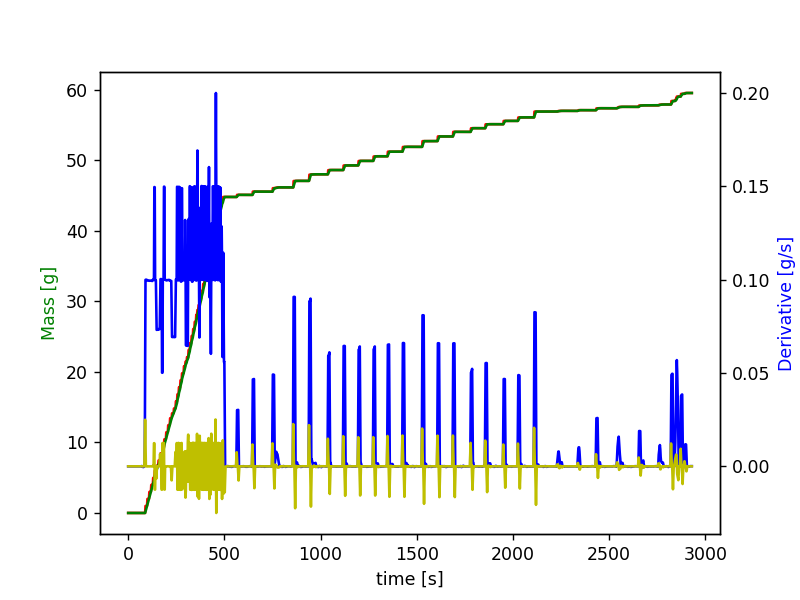

Addition of 0.301g Texapon SB 3 KC detected from 560s to 580s - expected volume = 0.57mL and actual volume = 0.272mL (resulting error is 52.324%)
Addition of 0.465g Texapon SB 3 KC detected from 642s to 662s - expected volume = 0.57mL and actual volume = 0.42mL (resulting error is 26.265%)
Addition of 0.605g Plantapon LC 7 detected from 746s to 788s - expected volume = 0.775mL and actual volume = 0.572mL (resulting error is 26.297%)
Addition of 0.93g Dehyton MC detected from 854s to 884s - expected volume = 0.911mL and actual volume = 0.857mL (resulting error is 5.935%)
Addition of 0.935g Dehyton MC detected from 936s to 980s - expected volume = 0.812mL and actual volume = 0.862mL (resulting error is 6.141%)
Addition of 0.611g Dehyton PK 45 detected from 1034s to 1058s - expected volume = 0.602mL and actual volume = 0.586mL (resulting error is 2.6%)
Addition of 0.654g Dehyton PK 45 detected from 1114s to 1134s - expected volume = 0.602mL and actual volume = 0.628mL (resulting error is 

In [50]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0034374999999999996 g/s and for 2nd derivative = 0.000546875 g/s^2


<IPython.core.display.Javascript object>


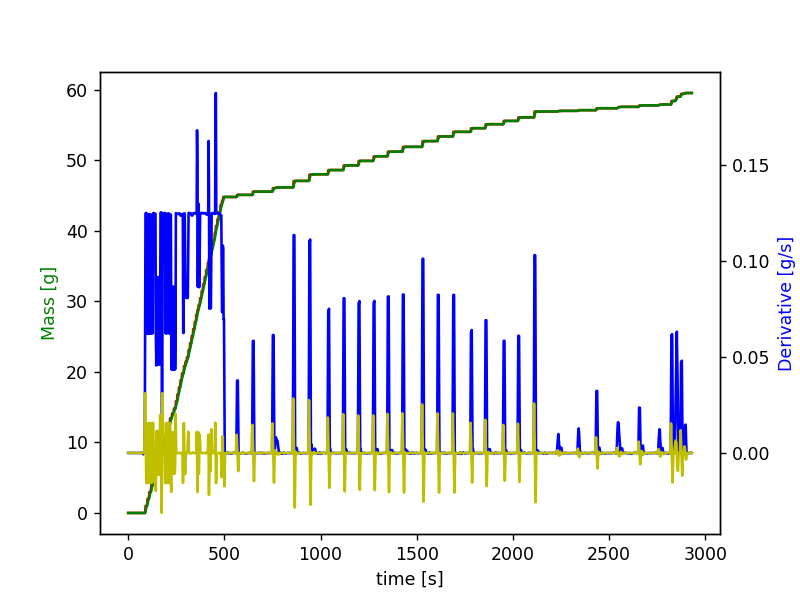

Addition of 0.099g Dehyquart CC7 Benz detected from 2226s to 2258s - expected volume = 0.11mL and actual volume = 0.096mL (resulting error is 12.389%)
Addition of 0.1g Dehyquart CC7 Benz detected from 2332s to 2352s - expected volume = 0.104mL and actual volume = 0.1mL (resulting error is 3.365%)
Addition of 0.279g Dehyquart CC7 Benz detected from 2428s to 2456s - expected volume = 0.272mL and actual volume = 0.272mL (resulting error is 0.045%)
Addition of 0.206g Dehyquart CC7 Benz detected from 2536s to 2574s - expected volume = 0.196mL and actual volume = 0.2mL (resulting error is 1.856%)
Addition of 0.211g Dehyquart CC7 Benz detected from 2650s to 2682s - expected volume = 0.206mL and actual volume = 0.208mL (resulting error is 0.778%)
Addition of 0.131g Dehyquart CC7 Benz detected from 2752s to 2784s - expected volume = 0.125mL and actual volume = 0.13mL (resulting error is 3.543%)


In [51]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


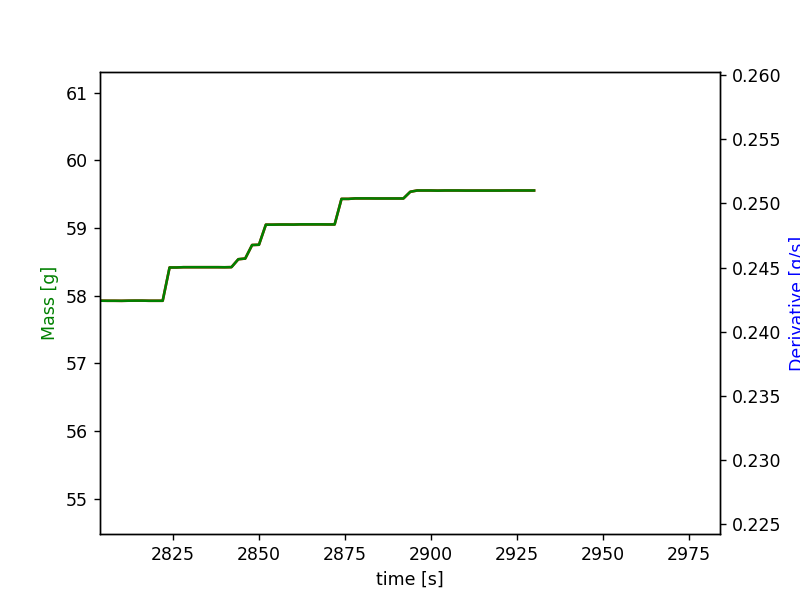

Addition of 0.494g Arlypon F detected from 2818s to 2830s - expected volume = 0.56mL and actual volume = 0.556mL (resulting error is 0.803%)
Addition of 0.631g Arlypon F detected from 2838s to 2858s - expected volume = 0.126mL and actual volume = 0.725mL (resulting error is 473.182%)
Addition of 0.384g Arlypon F detected from 2868s to 2880s - expected volume = 0.214mL and actual volume = 0.433mL (resulting error is 102.105%)
Addition of 0.117g Arlypon F detected from 2888s to 2902s - expected volume = 0.331mL and actual volume = 0.131mL (resulting error is 60.339%)


StopIteration: 

In [52]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_040523_S361-S366.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_6840\2010263404.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
360,361.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,10.027029,0.0,0.0,9.910680,0.0,0.0,0.955361,0.0,1.263785,0.0
361,362.0,0.000000,0.0,0.0,0.000000,0.000000,12.93228,0.000000,11.407021,0.000000,0.0,0.0,0.000000,0.0,0.0,2.993907,0.0,1.341709,0.0
362,363.0,0.000000,0.0,0.0,0.000000,11.725487,0.00000,7.757213,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.151975,0.0,2.082273,0.0
363,364.0,0.000000,0.0,0.0,7.871156,0.000000,0.00000,0.000000,0.000000,12.258505,0.0,0.0,0.000000,0.0,0.0,2.908186,0.0,1.148232,0.0
364,365.0,4.589685,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,8.798118,0.0,0.0,1.081435,0.0,4.671382,0.0
365,366.0,0.000000,0.0,0.0,0.000000,12.098199,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,2.583459,0.0,2.945512,0.0
